## **Gross Domestic Product (GDP) of Asian Countries Analysis**

In [1]:
# importing required Python libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_squared_log_error

In [2]:
# load the data
data = pd.read_csv('Asia_GDP.csv', delimiter=',')
data.describe(include='all')

,Country,Region,Population,Exports(% of GDP),Imports (% of GDP),Inflation rate (annual %),Labor force,GDP per capita (current US$),GNI per capita (current LCU),Unemployment rate (% of total labor force)
count,43,43,4.300000e+01,43.000000,43.000000,43.000000,4.300000e+01,43.000000,4.300000e+01,43.000000
unique,43,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Afghanistan,West Asia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,1.058989e+08,44.800393,44.937227,8.246745,4.705145e+07,14630.817263,2.504984e+07,6.401954
std,NaN,NaN,2.977968e+08,41.733711,37.565953,24.000770,1.383531e+08,18892.498346,1.164106e+08,4.704693
min,NaN,NaN,4.453730e+05,0.000000,0.000000,-0.606319,2.198280e+05,368.754614,0.000000e+00,0.258000
25%,NaN,NaN,4.114540e+06,21.479673,23.944391,1.288245,1.850522e+06,2638.508681,4.366159e+04,3.327000
50%,NaN,NaN,1.658902e+07,34.769157,37.759287,2.477102,8.267764e+06,4775.377454,2.181849e+05,5.074000
75%,NaN,NaN,6.269959e+07,58.731484,60.091752,6.832540,2.817787e+07,21347.668625,4.177679e+06,7.503500


In [3]:
data.head()

,Country,Region,Population,Exports(% of GDP),Imports (% of GDP),Inflation rate (annual %),Labor force,GDP per capita (current US$),GNI per capita (current LCU),Unemployment rate (% of total labor force)
0,Afghanistan,South Asia,40099462,0.000000,0.000000,0.000000,9390149,368.754614,3.100296e+04,13.283000
1,Armenia,West Asia,2790974,35.335980,43.830784,7.184836,1153003,4966.513471,2.428633e+06,20.896999
2,Azerbaijan,West Asia,10137750,46.661720,29.908990,6.650299,4919135,5387.997975,8.968755e+03,6.583000
3,Bahrain,West Asia,1463265,0.000000,0.000000,-0.606319,819130,26562.969140,0.000000e+00,1.874000
4,Bangladesh,South Asia,169356251,10.662779,17.061226,5.545654,70961067,2457.924880,2.194189e+05,5.229000


 ## **Data Exploration**

**Analyzing GDP per capita**

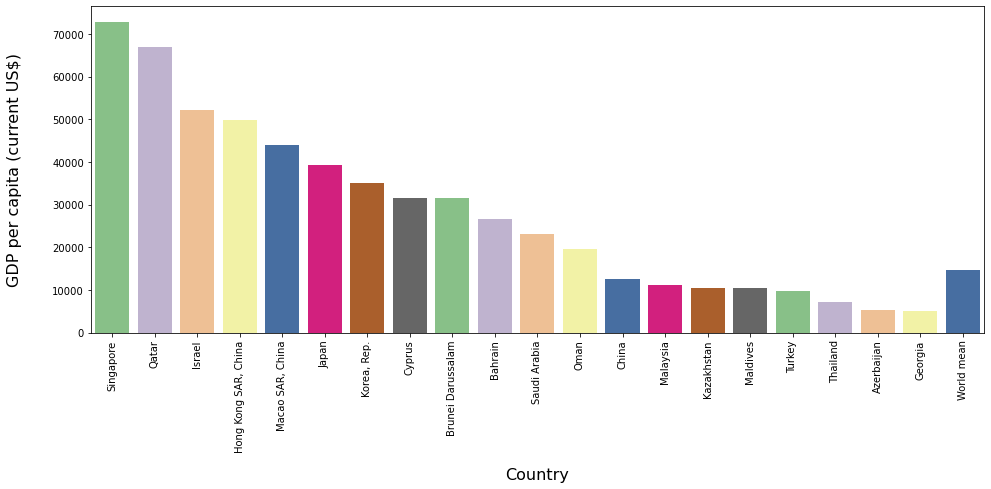

In [4]:
# Top 20 Countries with highest GDP per capita
fig, ax = plt.subplots(figsize=(16,6))
top_gdp_countries = data.sort_values('GDP per capita (current US$)',ascending=False).head(20)
mean = pd.DataFrame({'Country':['World mean'], 'GDP per capita (current US$)':[data['GDP per capita (current US$)'].mean()]})
gdps = pd.concat([top_gdp_countries[['Country','GDP per capita (current US$)']],mean],ignore_index=True)

sns.barplot(x='Country',y='GDP per capita (current US$)',data=gdps, palette='Accent')
ax.set_xlabel(ax.get_xlabel(),labelpad=15)
ax.set_ylabel(ax.get_ylabel(),labelpad=30)
ax.xaxis.label.set_fontsize(16)
ax.yaxis.label.set_fontsize(16)
plt.xticks(rotation=90)
plt.show()

**Correlation between variables**

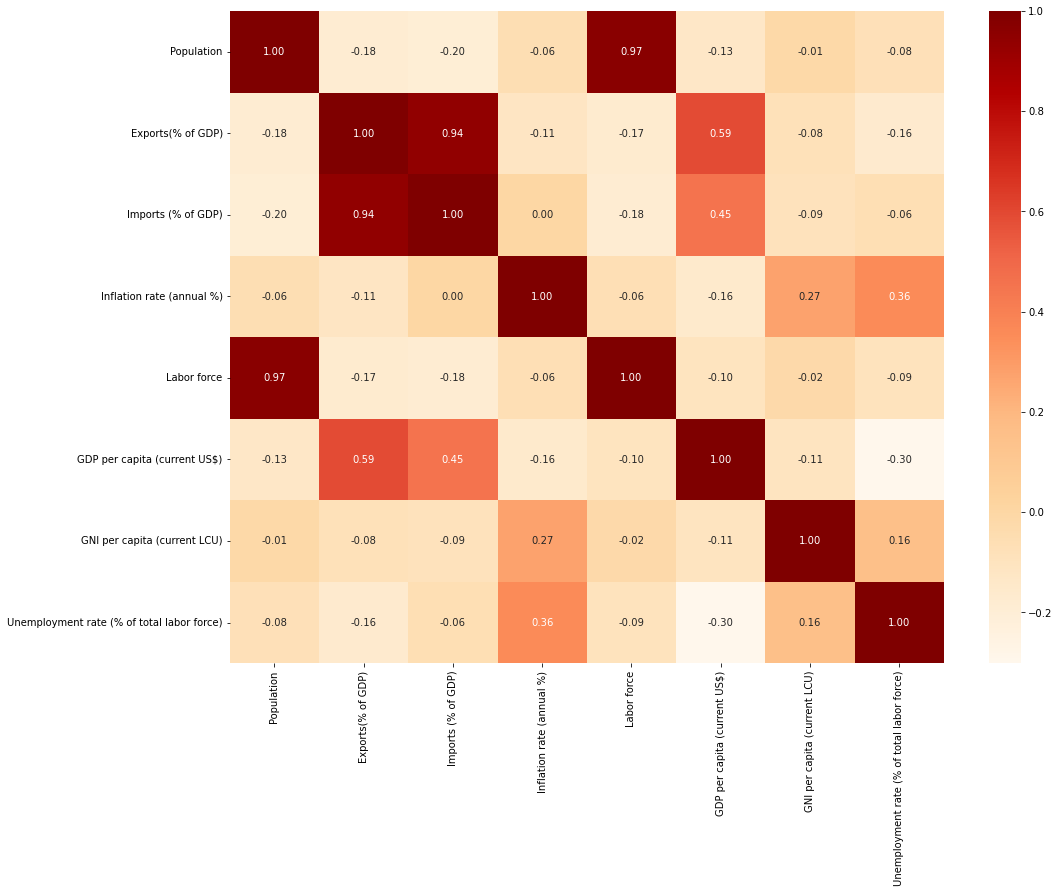

In [5]:
# heatmap to shows the correlation between all variables
plt.figure(figsize=(16,12))
sns.heatmap(data=data.iloc[:,2:].corr(),annot=True,fmt='.2f',cmap='OrRd')
plt.show()

C:\Users\Abegail Borces\AppData\Local\Temp\ipykernel_22632\3158748451.py:5: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  corr_to_gdp = pd.Series()


IndexError: index 7 is out of bounds for axis 0 with size 7

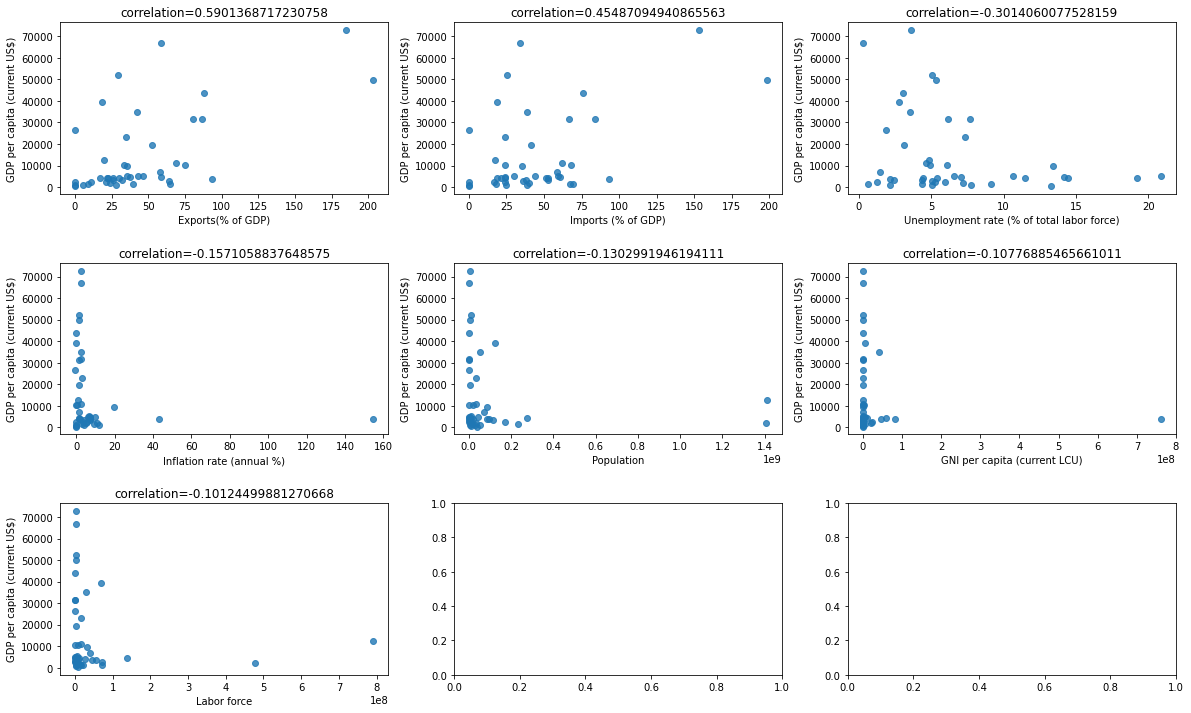

In [6]:
# Top Factors affecting GDP per capita
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20,12))
plt.subplots_adjust(hspace=0.4)

corr_to_gdp = pd.Series()
for col in data.columns.values[2:]:
    if ((col!='GDP per capita (current US$)')):
        corr_to_gdp[col] = data['GDP per capita (current US$)'].corr(data[col])
abs_corr_to_gdp = corr_to_gdp.abs().sort_values(ascending=False)
corr_to_gdp = corr_to_gdp.loc[abs_corr_to_gdp.index]

for i in range(3):
    for j in range(3):
        sns.regplot(x=corr_to_gdp.index.values[i*3+j], y='GDP per capita (current US$)', data=data,
                   ax=axes[i,j], fit_reg=False, marker='o')
        title = 'correlation='+str(corr_to_gdp[i*3+j])
        axes[i,j].set_title(title)
axes[1,2].set_xlim(0,102)
plt.show()

In [7]:
# Correlation coefficient of factors affecting GDP per capiat
print(corr_to_gdp)

Exports(% of GDP)                             0.590137
Imports (% of GDP)                            0.454871
Unemployment rate (% of total labor force)   -0.301406
Inflation rate (annual %)                    -0.157106
Population                                   -0.130299
GNI per capita (current LCU)                 -0.107769
Labor force                                  -0.101245
dtype: float64


## **Modelling**

In [8]:
# Training and Testing the data
train, test = train_test_split(data, test_size=0.3, shuffle=True)
training_features = ['Population', 'Exports(% of GDP)', 'Imports (% of GDP)', 
                     'Inflation rate (annual %)', 'Labor force', 
                     'GNI per capita (current LCU)', 
                     'Unemployment rate (% of total labor force)']
target = 'GDP per capita (current US$)'
train_X = train[training_features]
train_Y = train[target]
test_X = test[training_features]
test_Y = test[target]

In [9]:
# linear regression model
model = LinearRegression()
model.fit(train_X, train_Y)
train_pred_Y = model.predict(train_X)
test_pred_Y = model.predict(test_X)
train_pred_Y = pd.Series(train_pred_Y.clip(0, train_pred_Y.max()), index=train_Y.index)
test_pred_Y = pd.Series(test_pred_Y.clip(0, test_pred_Y.max()), index=test_Y.index)

rmse_train = np.sqrt(mean_squared_error(train_pred_Y, train_Y))
msle_train = mean_squared_log_error(train_pred_Y, train_Y)
rmse_test = np.sqrt(mean_squared_error(test_pred_Y, test_Y))
msle_test = mean_squared_log_error(test_pred_Y, test_Y)

print('rmse_train:',rmse_train,'msle_train:',msle_train)
print('rmse_test:',rmse_test,'msle_test:',msle_test)

rmse_train: 13836.666946691252 msle_train: 7.134639148266714
rmse_test: 12496.042714028803 msle_test: 14.400223059084214


In [10]:
# Random forest model.
model = RandomForestRegressor(n_estimators = 50,
                             max_depth = 6,
                             min_weight_fraction_leaf = 0.05,
                             max_features = 0.8,
                             random_state = 42)
model.fit(train_X, train_Y)
train_pred_Y = model.predict(train_X)
test_pred_Y = model.predict(test_X)
train_pred_Y = pd.Series(train_pred_Y.clip(0, train_pred_Y.max()), index=train_Y.index)
test_pred_Y = pd.Series(test_pred_Y.clip(0, test_pred_Y.max()), index=test_Y.index)

rmse_train = np.sqrt(mean_squared_error(train_pred_Y, train_Y))
msle_train = mean_squared_log_error(train_pred_Y, train_Y)
rmse_test = np.sqrt(mean_squared_error(test_pred_Y, test_Y))
msle_test = mean_squared_log_error(test_pred_Y, test_Y)

print('rmse_train:',rmse_train,'msle_train:',msle_train)
print('rmse_test:',rmse_test,'msle_test:',msle_test)

rmse_train: 8982.78129175649 msle_train: 0.803045778483036
rmse_test: 15387.891967075244 msle_test: 1.294396883148462


C:\Users\Abegail Borces\AppData\Local\Temp\ipykernel_22632\2655706494.py:4: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_test_Y = train_Y.append(test_Y)
C:\Users\Abegail Borces\AppData\Local\Temp\ipykernel_22632\2655706494.py:5: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_test_pred_Y = train_pred_Y.append(test_pred_Y)
D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


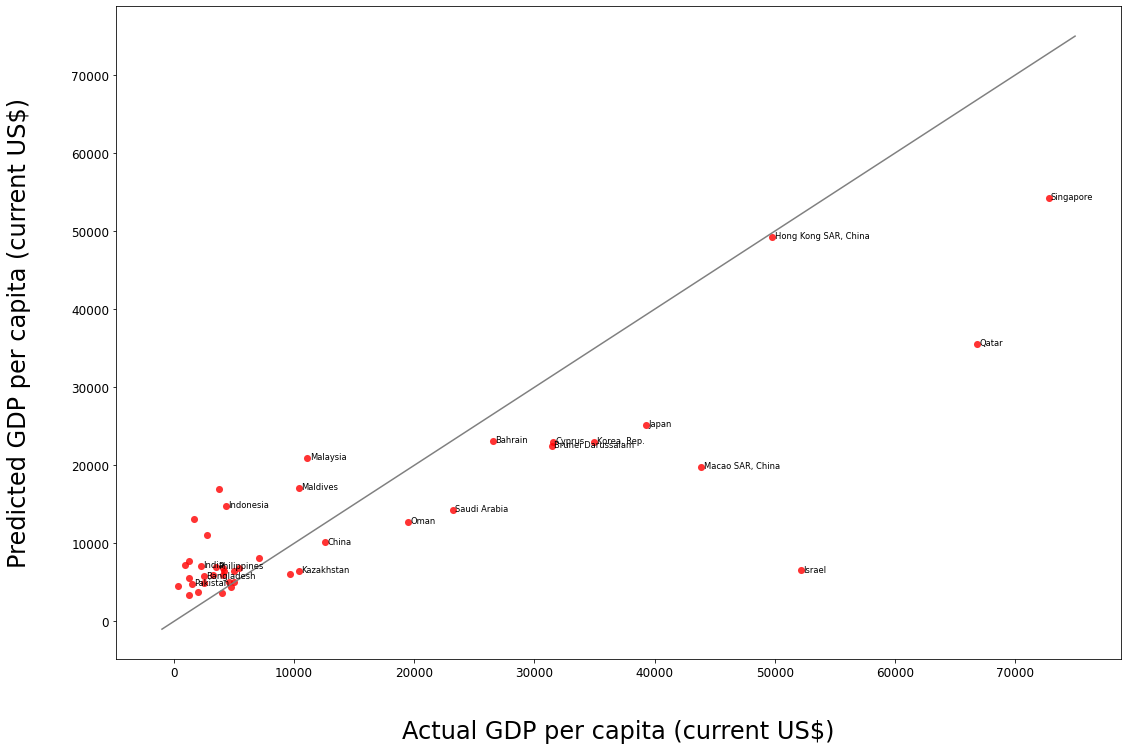

In [11]:
# Visualization of Results
plt.figure(figsize=(18,12))

train_test_Y = train_Y.append(test_Y)
train_test_pred_Y = train_pred_Y.append(test_pred_Y)

data_shuffled = data.loc[train_test_Y.index]
label = data_shuffled['Country']  

ax = sns.regplot(train_test_Y, train_test_pred_Y, marker='.', fit_reg=False, color='red', scatter_kws={'s':200, 'linewidths':0}) 

ax.set_xlabel('Actual GDP per capita (current US$)',labelpad=40)
ax.set_ylabel('Predicted GDP per capita (current US$)',labelpad=40)
ax.xaxis.label.set_fontsize(24)
ax.yaxis.label.set_fontsize(24)
ax.tick_params(labelsize=12)

x = np.linspace(-1000,75000,100) # 100 linearly spaced numbers
y = x
plt.plot(x,y,c='gray')

for i in range(0,train_test_Y.shape[0]):
    if((data_shuffled['Population'].iloc[i]>1e8) |
       (data_shuffled['GDP per capita (current US$)'].iloc[i]>10000)):
        plt.text(train_test_Y.iloc[i]+200, train_test_pred_Y.iloc[i]-200, label.iloc[i], size='small')

### **Analyzing Total GDP**

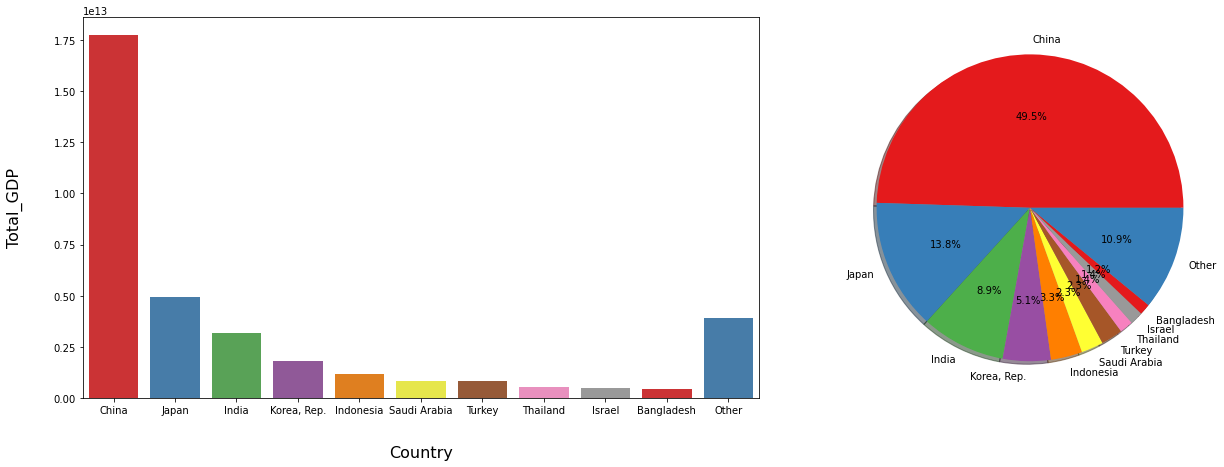

In [12]:
# Top 10 Coutries with highest total GDPs
data['Total_GDP ($)'] = data['GDP per capita (current US$)'] * data['Population']
#plt.figure(figsize=(16,6))
top_gdp_countries = data.sort_values('Total_GDP ($)',ascending=False).head(10)
other = pd.DataFrame({'Country':['Other'], 'Total_GDP ($)':[data['Total_GDP ($)'].sum() - top_gdp_countries['Total_GDP ($)'].sum()]})
gdps = pd.concat([top_gdp_countries[['Country','Total_GDP ($)']],other],ignore_index=True)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,7),gridspec_kw = {'width_ratios':[2,1]})
sns.barplot(x='Country',y='Total_GDP ($)',data=gdps,ax=axes[0],palette='Set1')
axes[0].set_xlabel('Country',labelpad=30,fontsize=16)
axes[0].set_ylabel('Total_GDP',labelpad=30,fontsize=16)

colors = sns.color_palette("Set1", gdps.shape[0]).as_hex()
axes[1].pie(gdps['Total_GDP ($)'], labels=gdps['Country'],colors=colors,autopct='%1.1f%%',shadow=True)
axes[1].axis('equal')
plt.show()

In [13]:
# Compared the above ten countries rank in total GDP and GDP per capita
Rank1 = data[['Country','Total_GDP ($)']].sort_values('Total_GDP ($)', ascending=False).reset_index()
Rank2 = data[['Country','GDP per capita (current US$)']].sort_values('GDP per capita (current US$)', ascending=False).reset_index()
Rank1 = pd.Series(Rank1.index.values+1, index=Rank1.Country)
Rank2 = pd.Series(Rank2.index.values+1, index=Rank2.Country)
Rank_change = (Rank2-Rank1).sort_values(ascending=False)
print('Rank of Total GDP - Rank of GDP per capita:')
Rank_change.loc[top_gdp_countries.Country]

Rank of Total GDP - Rank of GDP per capita:


Country
China           12
Japan            4
India           32
Korea, Rep.      3
Indonesia       19
Saudi Arabia     5
Turkey          10
Thailand        10
Israel          -6
Bangladesh      24
dtype: int64

C:\Users\Abegail Borces\AppData\Local\Temp\ipykernel_22632\2277234093.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  corr_to_gdp = pd.Series()


IndexError: index 7 is out of bounds for axis 0 with size 7

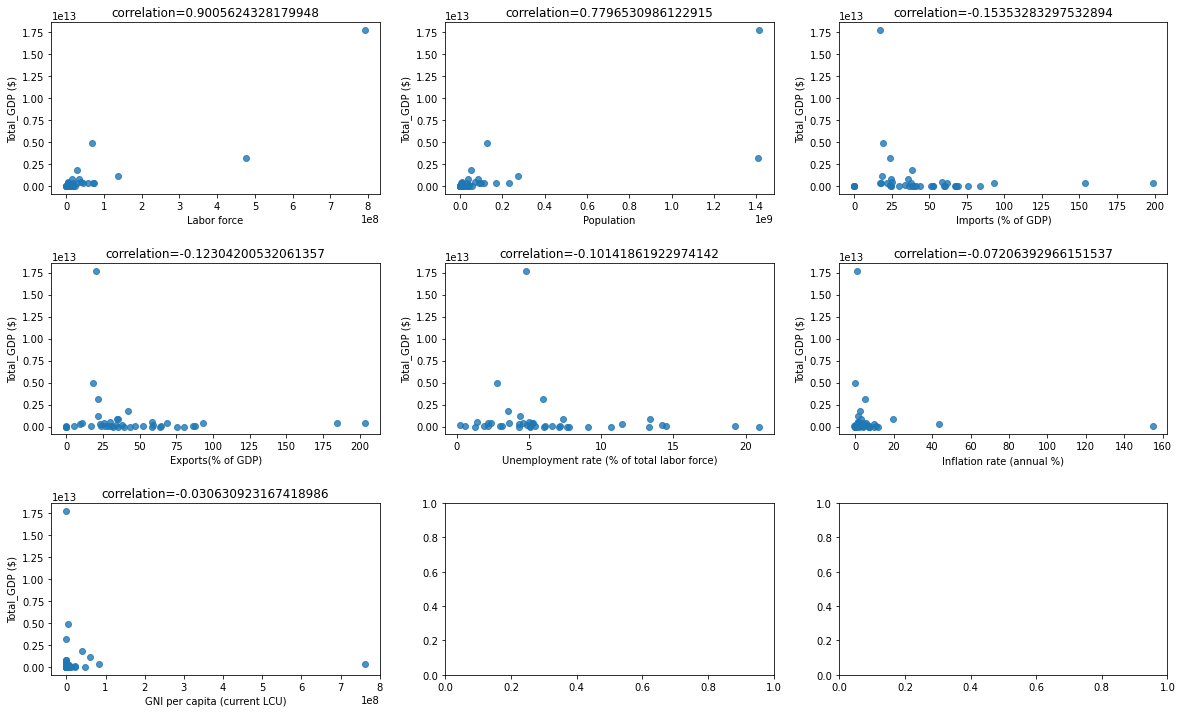

In [14]:
# Factors affecting Total GDP
corr_to_gdp = pd.Series()
for col in data.columns.values[2:]:
    if ((col!='Total_GDP ($)')&(col!='GDP per capita (current US$)')):
        corr_to_gdp[col] = data['Total_GDP ($)'].corr(data[col])
abs_corr_to_gdp = corr_to_gdp.abs().sort_values(ascending=False)
corr_to_gdp = corr_to_gdp.loc[abs_corr_to_gdp.index]

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20,12))
plt.subplots_adjust(hspace=0.4)

for i in range(3):
    for j in range(3):
        sns.regplot(x=corr_to_gdp.index.values[i*3+j], y='Total_GDP ($)', data=data,
                   ax=axes[i,j], fit_reg=False, marker='o')
        title = 'correlation='+str(corr_to_gdp[i*3+j])
        axes[i,j].set_title(title)
axes[1,2].set_xlim(0,102)
plt.show()

In [15]:
# Correlation coefficient of factors affecting Total GDP
print(corr_to_gdp)

Labor force                                   0.900562
Population                                    0.779653
Imports (% of GDP)                           -0.153533
Exports(% of GDP)                            -0.123042
Unemployment rate (% of total labor force)   -0.101419
Inflation rate (annual %)                    -0.072064
GNI per capita (current LCU)                 -0.030631
dtype: float64


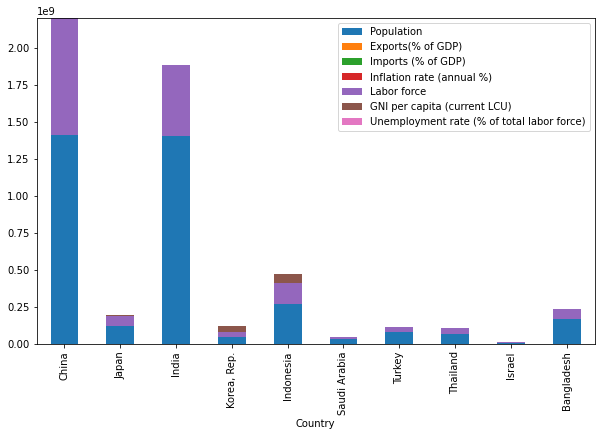

In [16]:
plot_data = top_gdp_countries[['Country','Population', 'Exports(% of GDP)', 'Imports (% of GDP)', 
                     'Inflation rate (annual %)', 'Labor force', 
                     'GNI per capita (current LCU)', 
                     'Unemployment rate (% of total labor force)']]
plot_data = plot_data.set_index('Country')
ax = plot_data.plot.bar(stacked=True,figsize=(10,6))
ax.legend(bbox_to_anchor=(1, 1))
plt.show()